In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_additional/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/additional/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_flux_momentum.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Flux variation, systematic

In [4]:
# Load input files
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)

try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"Additinoal_POT.root","RECREATE");

#filename_overlay = 'Flux/NuCCana_overlay_flux_small.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.00616325213863
Dirt:		0.0611423668132


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [7]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [8]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [9]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [10]:
#Since the efficiency does not change very much per universe the nominal efficiency e_tilde is used
# in order not to calculated the whole detector smearing again
eff_tilde = np.load(input_filedir+'eff_tilde_momentum_xsec_CV.npy')
print eff_tilde

[0.20860206 0.34723513 0.45227726 0.53524989 0.60836289 0.63187201
 0.58248787]


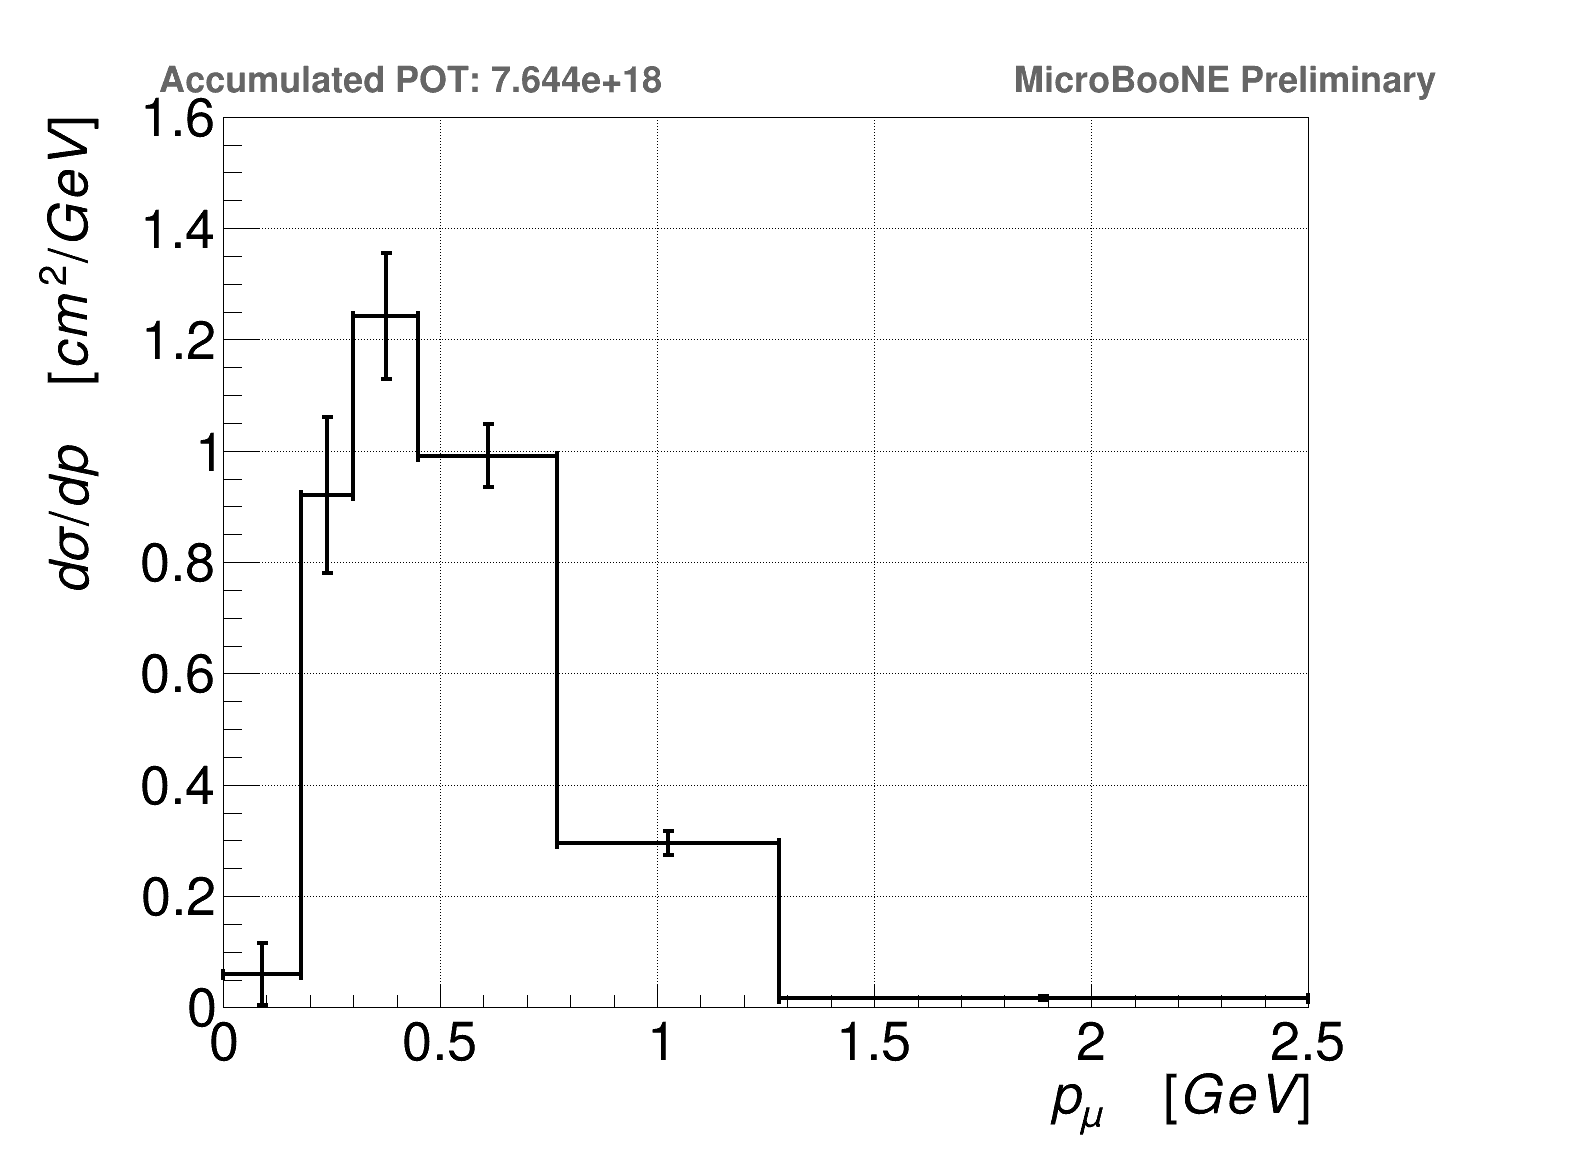

In [12]:
# load CV values
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path+"xsec_momentum_wighted.root", 'read')
h_overlay_cv = ROOT.TH1F('h_overlay_cv',"xsec momentum",binnum,array('f',mom_bins))
h_overlay_cv = f_cv.Get("h_overlay")
h_data_mom = f_cv.Get("h_data")
h_ext_mom = f_cv.Get("h_ext")
h_dirt_mom = f_cv.Get("h_dirt")
h_cv =  h_data_mom.Clone()
h_cv.Add(h_ext_mom,-1)
h_cv.Add(h_dirt_mom,-1)
h_cv.Add(h_overlay_cv,-1)
h_cv.Scale(1.0/(N_tot * beam_flux * 1e-38 ))
h_cv.SetLineColor(1)
for i in range(1,binnum+1):
    value = h_cv.GetBinContent(i)
    width = h_cv.GetBinWidth(i)
    h_cv.SetBinContent(i,value/(width*eff_tilde[i-1]))
    h_cv.SetBinError(i,h_cv.GetBinError(i)/(width*eff_tilde[i-1]))
    
h_cv.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_cv.SetXTitle("p_{\mu} \quad [GeV]")
h_cv.GetYaxis().SetTitleSize(0.05)
h_cv.GetYaxis().SetTitleOffset(0.0)
h_cv.GetYaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleSize(0.05)
h_cv.GetXaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleOffset(1)
#h_covariance.SetLineColor(ROOT.kBlack)
h_cv.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
prelim, pot_tex = draw_adding()
#h_cv.SetMaximum(h_1d_xsec[0][0].GetMaximum()*1.1)
h_cv.SetMinimum(0)
h_cv.SetMaximum(1.6)
h_cv2 = h_cv.Clone()
h_cv.Draw('Hist E1')
prelim.Draw()
pot_tex.Draw()
c1.Draw()

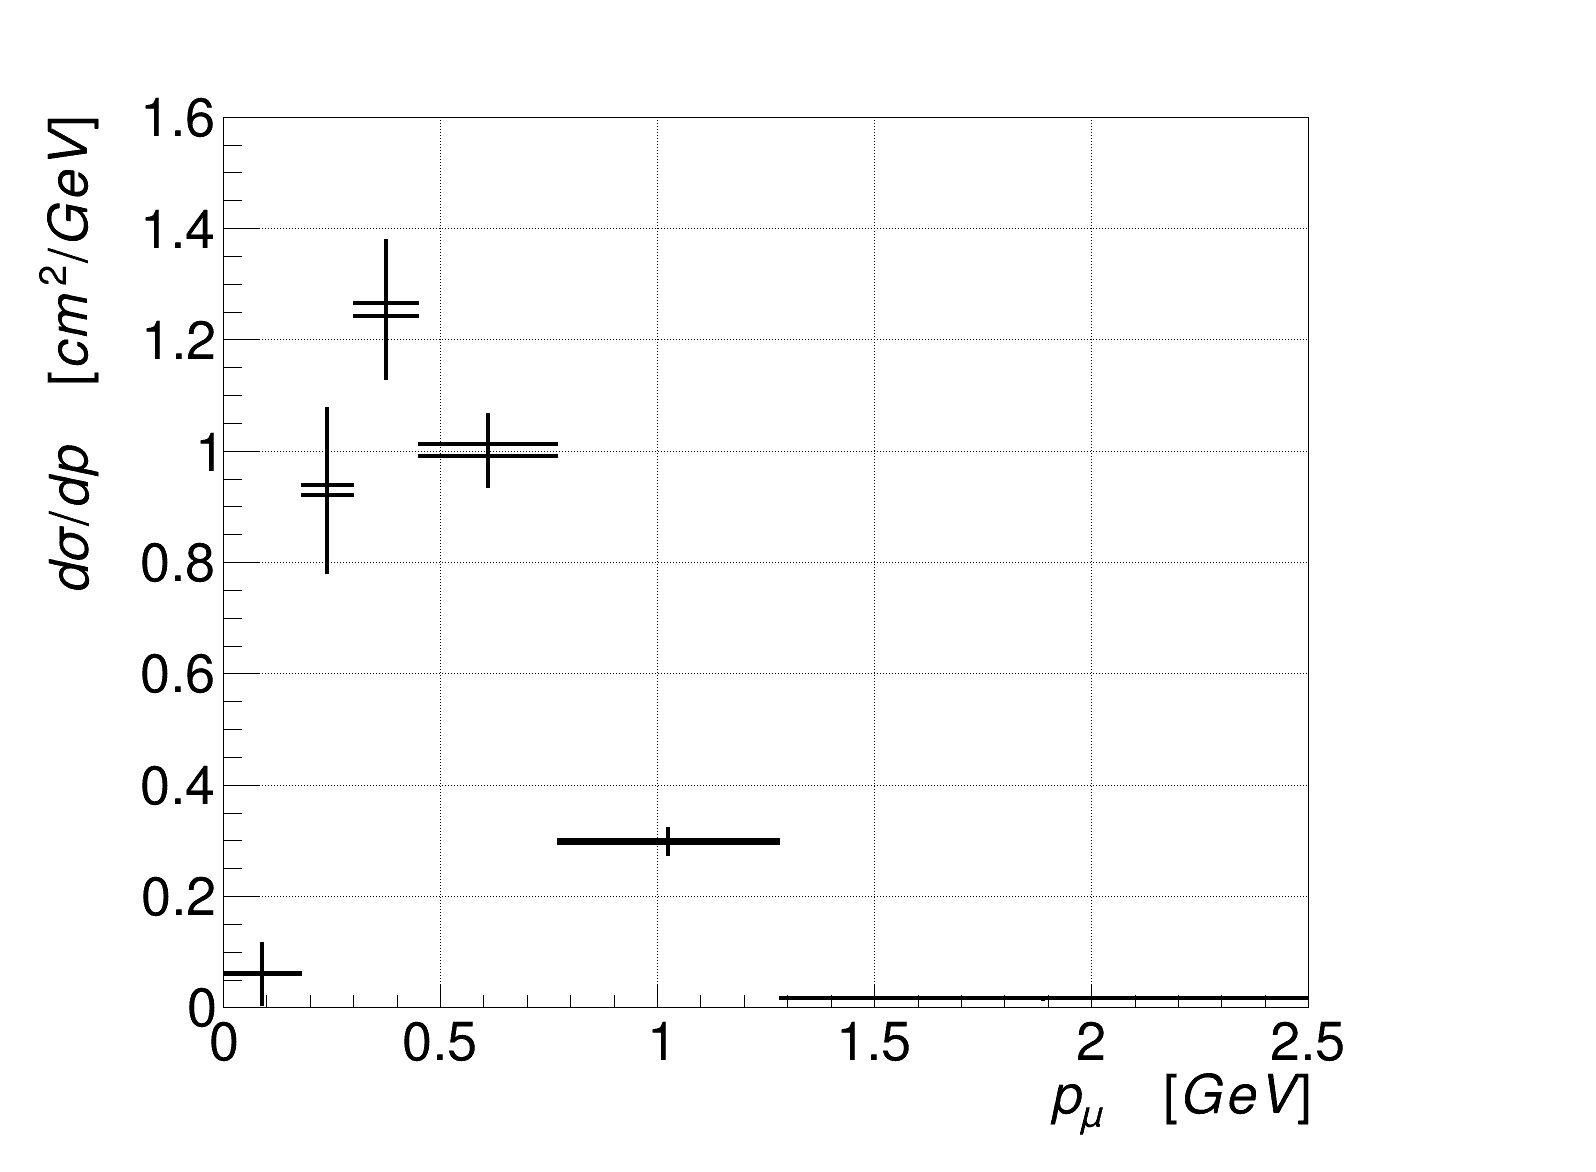

In [13]:
h_cv_add = h_cv.Clone()
for i in range(1,binnum+1):
    value = h_cv_add.GetBinContent(i)
    h_cv_add.SetBinContent(i,value*1.02)
h_cv_add.Draw()
h_cv.Draw('same')
c1.Draw()

In [14]:
xsec_cov_matrix = np.zeros((binnum,binnum)) # covariance matrix
xsec_corr_matrix = np.zeros((binnum,binnum)) # correlation matrix
xsec_frac_cov_matrix = np.zeros((binnum,binnum)) # fractional covariance matrix


xsec_diff_matrix = np.zeros((binnum))
xsec_diff_matrix_1 = np.zeros((binnum))
for i in range(1,binnum+1):
    xsec_var = h_cv_add.GetBinContent(i)
    xsec_cv = h_cv.GetBinContent(i)
    xsec_diff_matrix[i-1] = xsec_var - xsec_cv
    xsec_diff_matrix_1[i-1] = (xsec_var - xsec_cv)/(xsec_cv+1e-80)
xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(binnum,1) * xsec_diff_matrix
xsec_frac_cov_matrix = xsec_frac_cov_matrix + xsec_diff_matrix_1.reshape(binnum,1) * xsec_diff_matrix_1

for i in range(binnum):
    for j in range(binnum):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))
    

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_additional//png/h_covariance_2percent.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_additional//root/h_covariance_2percent.root has been created


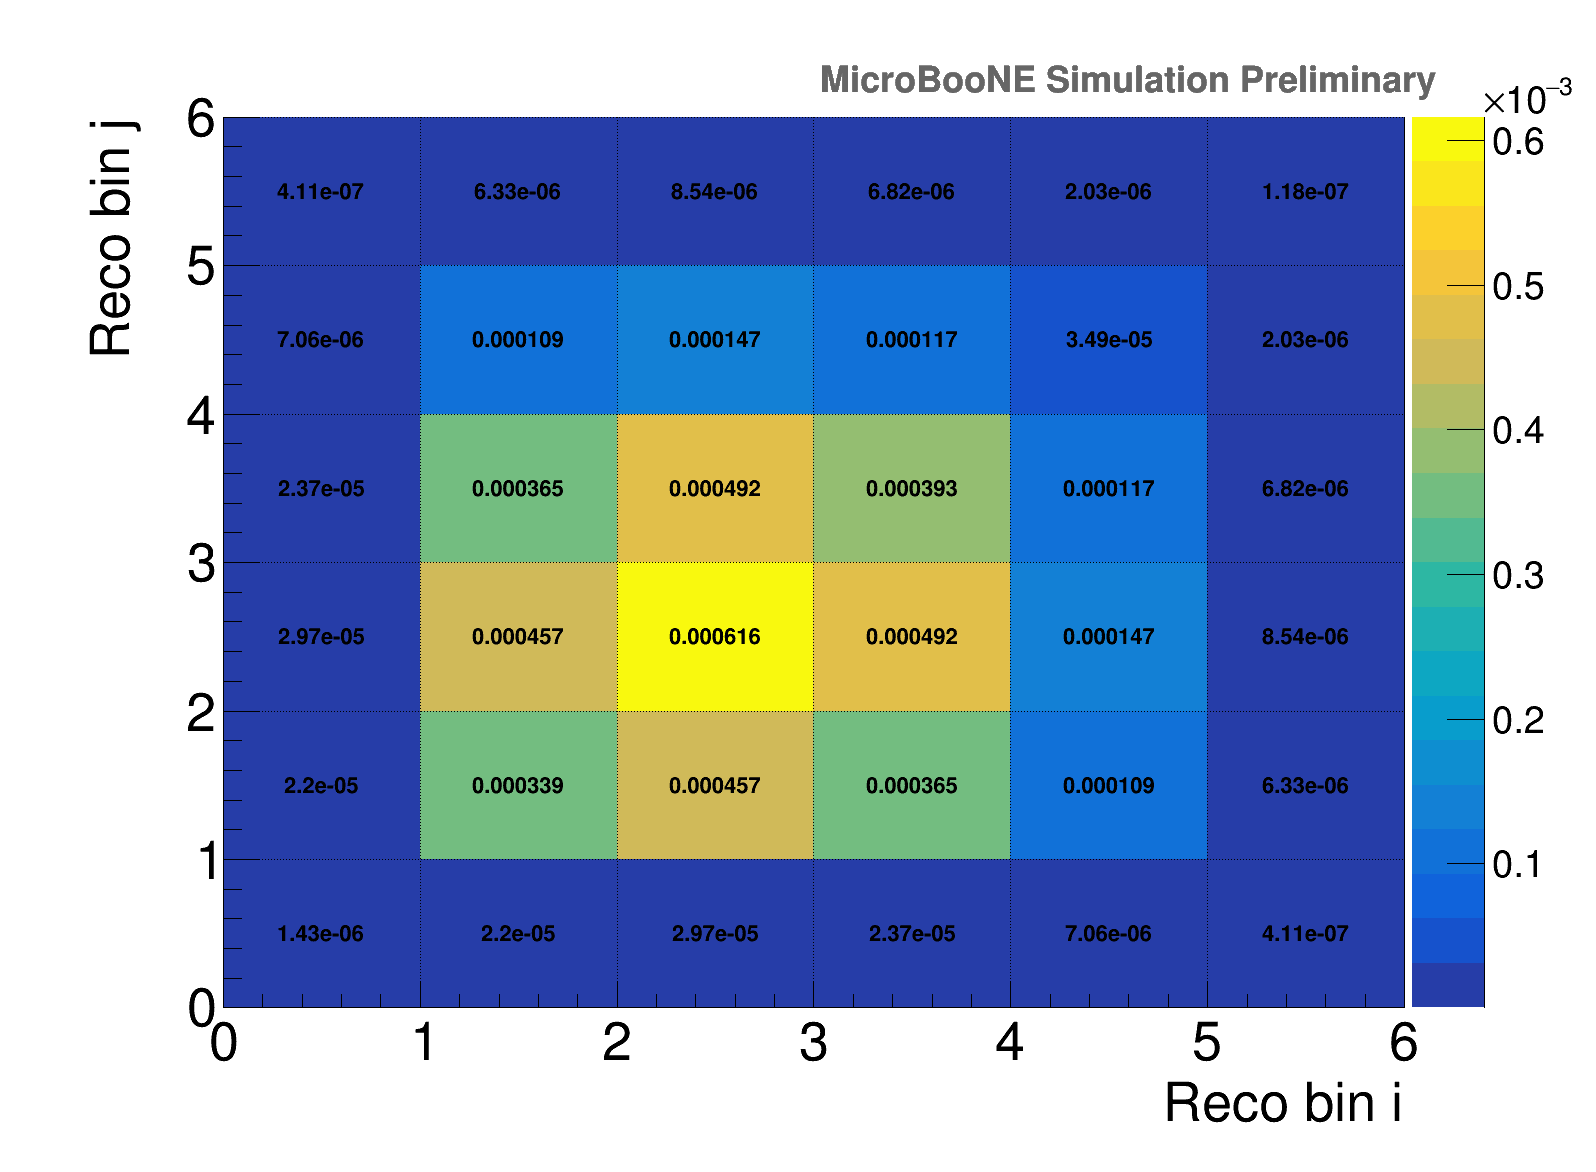

In [15]:
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_2percent.png")
c1.SaveAs(outputdir_root + "h_covariance_2percent.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_additional//png/h_frac_covariance_2percent.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_additional//root/h_frac_covariance_2percent.root has been created


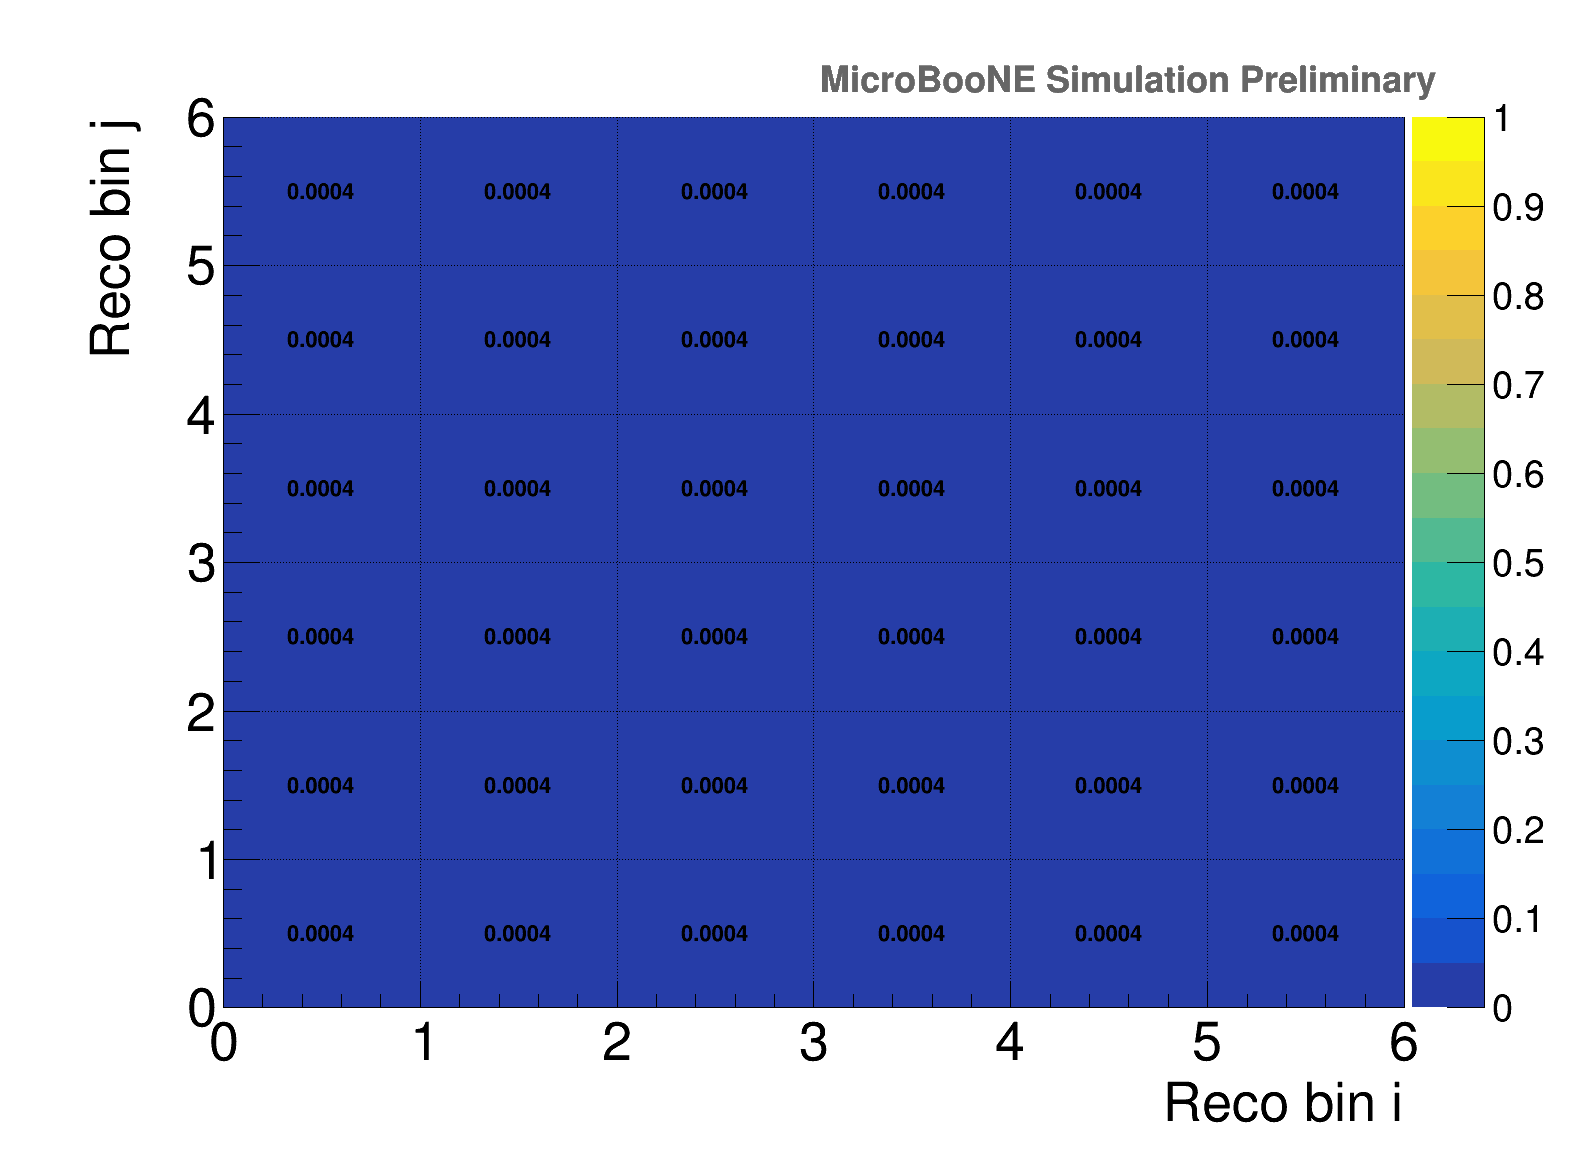

In [16]:
ROOT.gStyle.SetPaintTextFormat('0.5f')
h_frac_covariance = ROOT.TH2D("h_frac_covariance",'Fractional covariance matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_frac_cov_matrix[i,j])
#h_covariance.SetMinimum(-1)
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4f')
h_covariance.SetMinimum(0)
h_covariance.SetMaximum(1)
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_2percent.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_2percent.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_additional//png/h_correlation_2percent.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_additional//root/h_correlation_2percent.root has been created


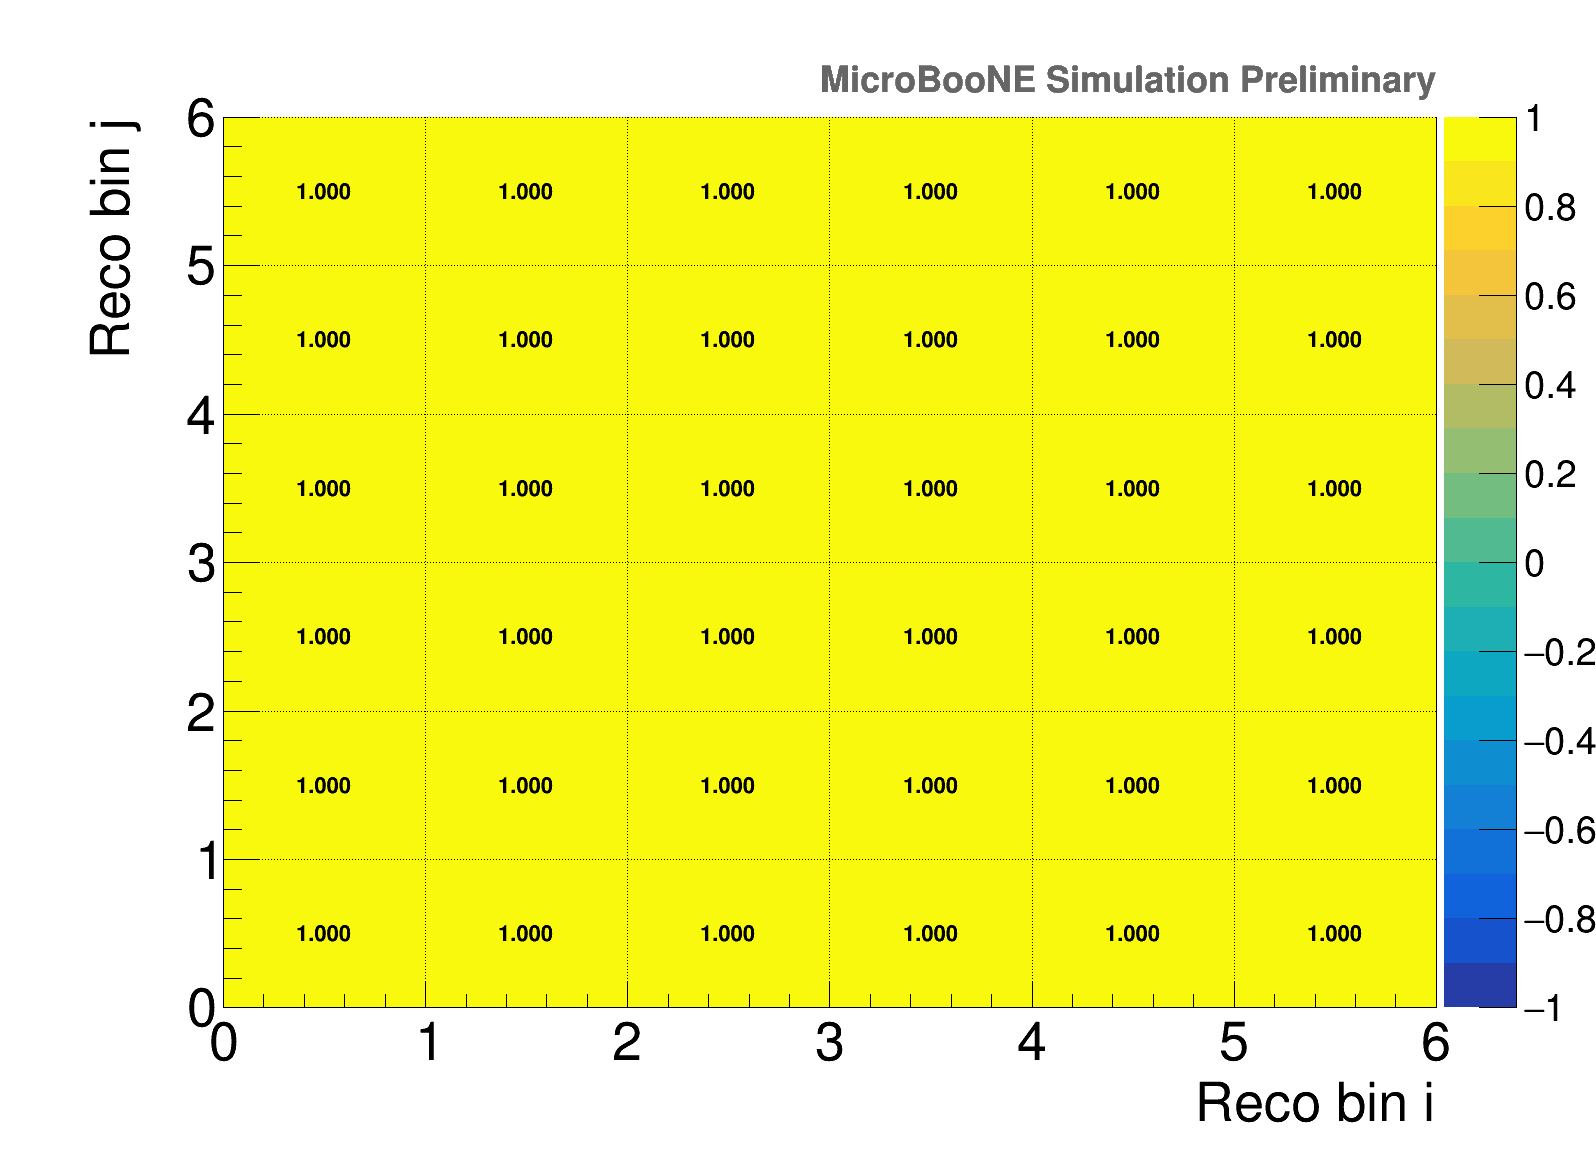

In [17]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")

h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_2percent.png")
c1.SaveAs(outputdir_root + "h_correlation_2percent.root")

In [18]:
# load CV values
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_files/'
f_cv = ROOT.TFile.Open(path+"xsec_momentum_wighted.root", 'read')
h_overlay_cv = ROOT.TH1F('h_overlay_cv',"xsec momentum",binnum,array('f',mom_bins))
h_overlay_cv = f_cv.Get("h_overlay")
h_data_mom = f_cv.Get("h_data")
h_ext_mom = f_cv.Get("h_ext")
h_dirt_mom = f_cv.Get("h_dirt")
h_cv =  h_data_mom.Clone()
h_cv.Add(h_ext_mom,-1)
h_cv.Add(h_dirt_mom,-1)
h_cv.Add(h_overlay_cv,-1)
h_cv.Scale(1.0/(N_tot * beam_flux * 1e-38 ))
h_cv.SetLineColor(1)
for i in range(1,binnum+1):
    value = h_cv.GetBinContent(i)
    width = h_cv.GetBinWidth(i)
    h_cv.SetBinContent(i,value/(width*eff_tilde[i-1]))
    h_cv.SetBinError(i,h_cv.GetBinError(i)/(width*eff_tilde[i-1]))

    #h_cv.SetBinError(i,h_cv.GetBinContent(i)*0.02)
    
h_cv.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_cv.SetXTitle("p_{\mu} \quad [GeV]")
h_cv.GetYaxis().SetTitleSize(0.05)
h_cv.GetYaxis().SetTitleOffset(0.0)
h_cv.GetYaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleSize(0.05)
h_cv.GetXaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleOffset(1)
#h_covariance.SetLineColor(ROOT.kBlack)
h_cv.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
prelim, pot_tex = draw_adding()
#h_cv.SetMaximum(h_1d_xsec[0][0].GetMaximum()*1.1)
h_cv.SetMinimum(0)
h_cv.SetMaximum(1.6)
h_cv.Draw('Hist E1')
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_stat_2percent.png")
c1.SaveAs(outputdir_root + "h_xsec_stat_2percent.root")

ReferenceError: attempt to access a null-pointer

Error in <TFile::TFile>: file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_files/xsec_momentum_wighted.root does not exist


In [19]:
# load CV values
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_files/'
f_cv = ROOT.TFile.Open(path+"xsec_momentum_wighted.root", 'read')
h_overlay_cv = ROOT.TH1F('h_overlay_cv',"xsec momentum",binnum,array('f',mom_bins))
h_overlay_cv = f_cv.Get("h_overlay")
h_data_mom = f_cv.Get("h_data")
h_ext_mom = f_cv.Get("h_ext")
h_dirt_mom = f_cv.Get("h_dirt")
h_cv =  h_data_mom.Clone()
h_cv.Add(h_ext_mom,-1)
h_cv.Add(h_dirt_mom,-1)
h_cv.Add(h_overlay_cv,-1)
h_cv.Scale(1.0/(N_tot * beam_flux * 1e-38 ))
h_cv.SetLineColor(1)
h_cv2 = h_cv.Clone()
for i in range(1,binnum+1):
    value = h_cv.GetBinContent(i)
    width = h_cv.GetBinWidth(i)
    h_cv.SetBinContent(i,value/(width*eff_tilde[i-1]))
    h_cv2.SetBinContent(i,value/(width*eff_tilde[i-1]))
    h_cv2.SetBinError(i,h_cv.GetBinError(i)/(width*eff_tilde[i-1]))
    h_cv.SetBinError(i,math.sqrt( math.pow(h_cv.GetBinContent(i)*0.02,2)+math.pow(h_cv.GetBinError(i)/(width*eff_tilde[i-1]),2)))
  
h_cv.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_cv.SetXTitle("p_{\mu} \quad [GeV]")
h_cv.GetYaxis().SetTitleSize(0.05)
h_cv.GetYaxis().SetTitleOffset(0.0)
h_cv.GetYaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleSize(0.05)
h_cv.GetXaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleOffset(1)
#h_covariance.SetLineColor(ROOT.kBlack)
h_cv.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
prelim, pot_tex = draw_adding()
#h_cv.SetMaximum(h_1d_xsec[0][0].GetMaximum()*1.1)
h_cv.SetMinimum(0)
h_cv.SetMaximum(1.6)
h_cv.SetLineColor(ROOT.kGray+2)
h_cv.Draw('Hist E1')
h_cv2.SetLineColor(ROOT.kRed)
h_cv2.Draw('E1 same')
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_stat_sys_2percent.png")
c1.SaveAs(outputdir_root + "h_xsec_stat_sys_2percent.root")

ReferenceError: attempt to access a null-pointer

Error in <TFile::TFile>: file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_files/xsec_momentum_wighted.root does not exist
Warning in <TROOT::Append>: Replacing existing TH1: h_overlay_cv (Potential memory leak).


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_additional//png/h_xsec_sys_2percent.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_additional//root/h_xsec_sys_2percent.root has been created


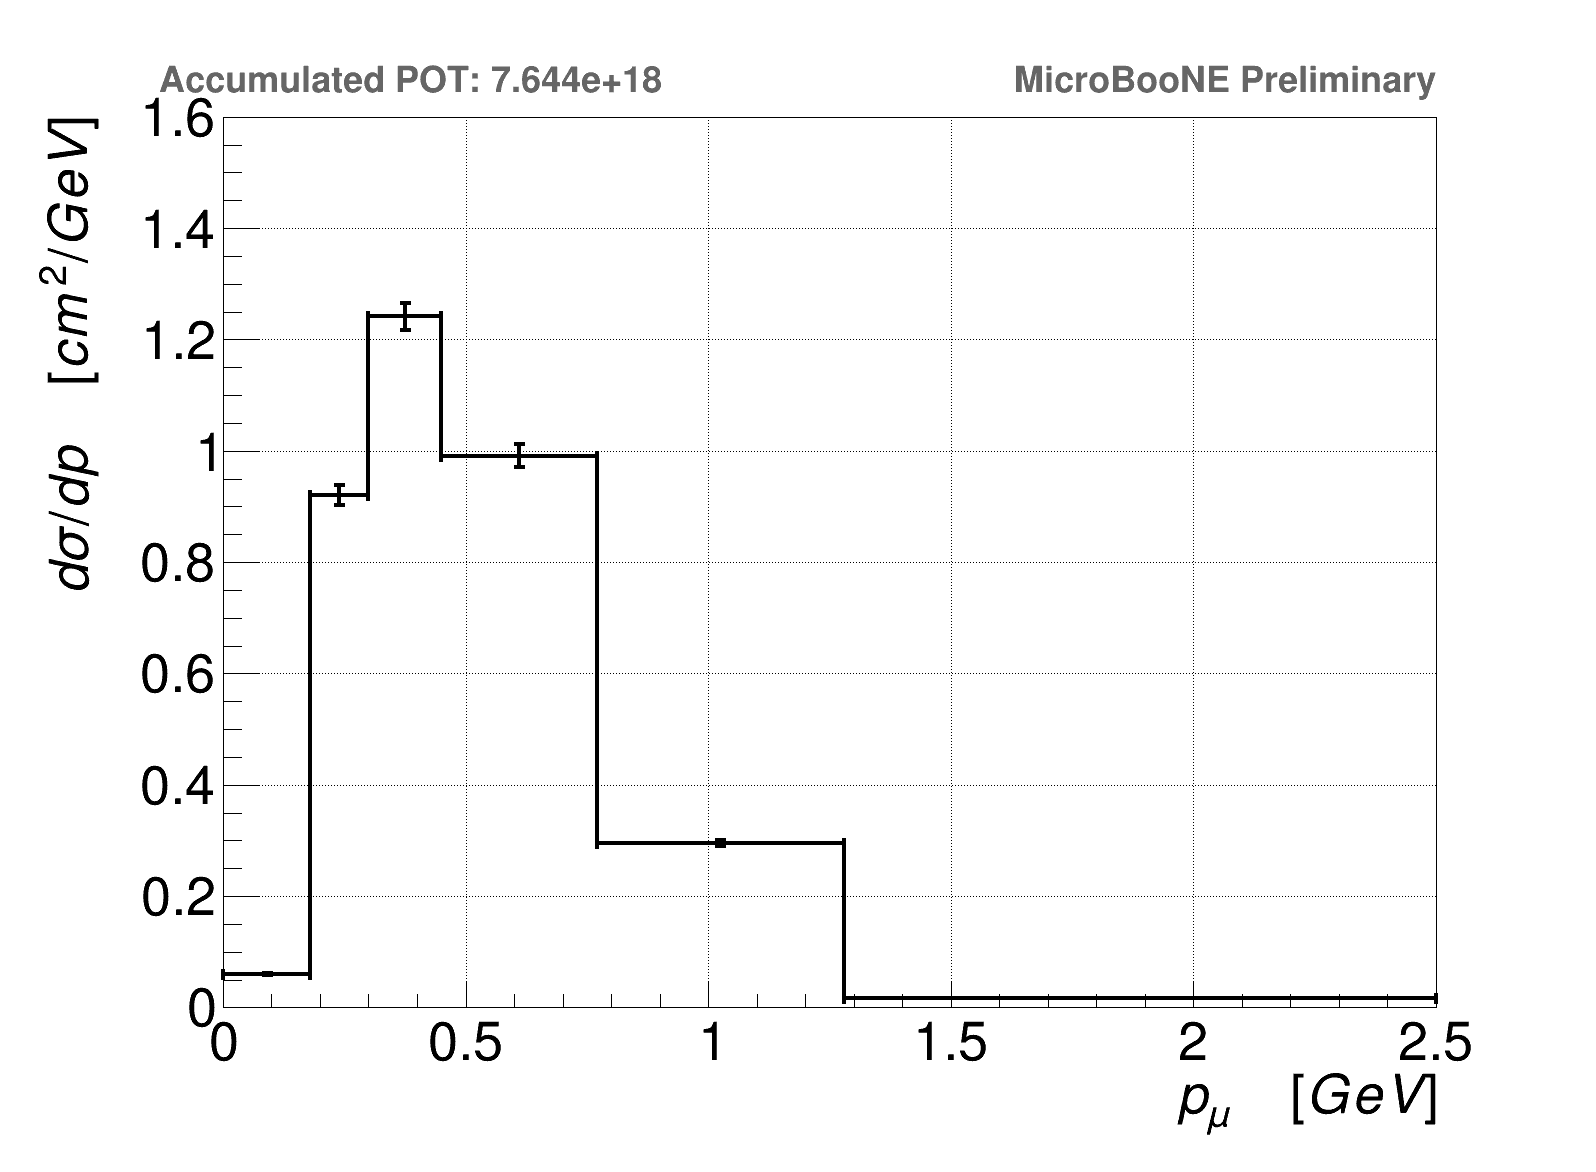

In [21]:
# load CV values
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path+"xsec_momentum_wighted.root", 'read')
h_overlay_cv = ROOT.TH1F('h_overlay_cv',"xsec momentum",binnum,array('f',mom_bins))
h_overlay_cv = f_cv.Get("h_overlay")
h_data_mom = f_cv.Get("h_data")
h_ext_mom = f_cv.Get("h_ext")
h_dirt_mom = f_cv.Get("h_dirt")
h_cv =  h_data_mom.Clone()
h_cv.Add(h_ext_mom,-1)
h_cv.Add(h_dirt_mom,-1)
h_cv.Add(h_overlay_cv,-1)
h_cv.Scale(1.0/(N_tot * beam_flux * 1e-38 ))
h_cv.SetLineColor(1)
h_cv2 = h_cv.Clone()
for i in range(1,binnum+1):
    value = h_cv.GetBinContent(i)
    width = h_cv.GetBinWidth(i)
    h_cv.SetBinContent(i,value/(width*eff_tilde[i-1]))
    h_cv2.SetBinContent(i,value/(width*eff_tilde[i-1]))
    h_cv2.SetBinError(i,h_cv.GetBinError(i)/(width*eff_tilde[i-1]))
    h_cv.SetBinError(i,math.sqrt( math.pow(h_cv.GetBinContent(i)*0.02,2)+0*math.pow(h_cv.GetBinError(i)/(width*eff_tilde[i-1]),2)))
  
h_cv.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_cv.SetXTitle("p_{\mu} \quad [GeV]")
h_cv.GetYaxis().SetTitleSize(0.05)
h_cv.GetYaxis().SetTitleOffset(0.0)
h_cv.GetYaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleSize(0.05)
h_cv.GetXaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleOffset(1)
#h_covariance.SetLineColor(ROOT.kBlack)
h_cv.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
prelim, pot_tex = draw_adding()
#h_cv.SetMaximum(h_1d_xsec[0][0].GetMaximum()*1.1)
h_cv.SetMinimum(0)
h_cv.SetMaximum(1.6)
h_cv.SetLineColor(ROOT.kBlack)
h_cv.Draw('Hist E1')
#h_cv2.SetLineColor(ROOT.kRed)
#h_cv2.Draw('E1 same')
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_sys_2percent.png")
c1.SaveAs(outputdir_root + "h_xsec_sys_2percent.root")